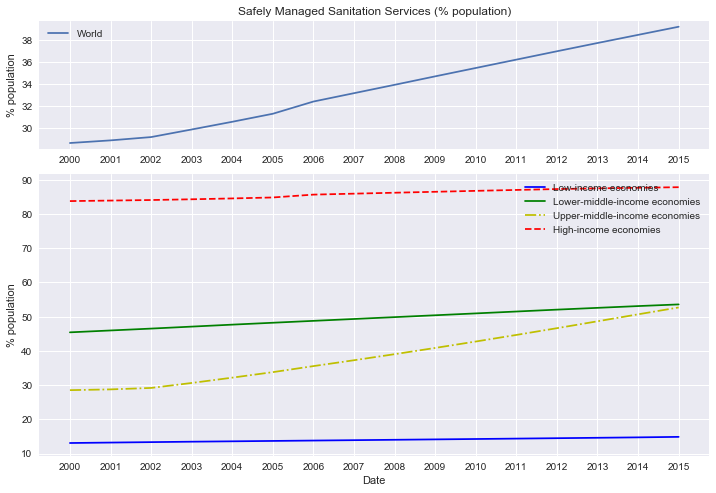

In [4]:
# Task: World Bank_DECDG_Technical Exercise_Sanitation Services
# Author: Shuting Sun
# Python Version: 3.6.0
# Date: Oct 4, 2018

import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#sns.set_palette("husl", 8) # set colors
#%matplotlib inline # show figure in Jupyter
#import datetime
# data_dates = (datetime.datetime(2001,1,1), datetime.datetime(2015,1,1))

indicators_sanitation = {'SH.STA.SMSS.ZS':'sanitation'}
indicators_population = {'SP.POP.TOTL':'population'}
indicators = {'SH.STA.SMSS.ZS':'sanitation', 'SP.POP.TOTL':'population'}

def countries_incomelevel(inc): # Parameter inc is the incomelevel 
    """Get country codes for any given income level"""
    """BY INCOME
        Low-income economies - LIC
        Lower-middle-income economies - LMC
        Upper-middle-income economies - UMC
        High-income economies - HIC
    """
    countries = [i['id'] for i in \
                 wbdata.get_country(incomelevel = [inc], display = False)]
    return countries

def multiply_two_columns(df, a, b, c): # a & b are existing column names, c is the name of the generated column 
    """For any given dataframe(df), column a * column b, save the result in column c"""
    df[c] = df[a] * df[b]
    return df

def divide_two_columns(df, a, b, c):
    """For any given dataframe(df), column a / column b, save the result in column c"""
    df[c] = df[a] / df[b]
    return df

def sum_at_index(df, ind):
    """Group the dataframe on a certain level (for example 'country' or 'date'), and sum the corresponding rows"""
    df1 = df.groupby(level = ind).sum()
    return df1

def clean_data(df):
    """for any given dataframe(df), drop the rows with at one least missing value, and sort dataframe by index"""
    df_clean = df.dropna().sort_index()
    return df_clean
     
def overall_trend(ax):
    """Plot the overall trend of safely managed sanitation facilities"""
    df = wbdata.get_dataframe(indicators_sanitation, country = ["WLD"], convert_date = False).dropna() # 'WLD' is the code of world"
    df_clean = clean_data(df)
    # A matplotlib plot with legend, labels and a title
    xlabels = df_clean.index
    ax.plot(xlabels, df_clean)
    ax.legend(["World"], loc='best')
    ax.set_title("Safely Managed Sanitation Services (% population)")
    ax.set_ylabel('% population')
   
def data_incomelevel(inc): # Parameter inc is the incomelevel 
    """Given an income level, return a plotable dataframe"""
    df = wbdata.get_dataframe(indicators, country = countries_incomelevel(inc), convert_date = False)
    df_clean = clean_data(df) # clean data, drop all the rows with missing value (missing population value or sanitation value), sort index
    df_mul = multiply_two_columns(df_clean,"sanitation", "population", "san_pop") # san_pop = sanitation * population, a new column
    df_sum = sum_at_index(df_mul, "date") # group the dataset on "date", and sum population value and san_pop value
    df_div = divide_two_columns(df_sum, "san_pop", "population", "trend") # trend = san_pop / population
    df_final = df_div["trend"] # only keep "trend" column, for plot
    return df_final
    
def incomelevel_sanitation_trend(ax):
    """For different income levels, plot the trend of the safely managed sanitation facilities (% of population with access)"""   
    df1 = data_incomelevel("LIC")
    df2 = data_incomelevel("LMC")
    df3 = data_incomelevel("UMC")
    df4 = data_incomelevel("HIC")
    xlabels = df1.index
    
    ax.plot(xlabels, df1, "b+-")
    ax.plot(xlabels, df2, "g-")
    ax.plot(xlabels, df3, "y-.")
    ax.plot(xlabels, df4, "r--")
    
    #df4_mean.plot(ax = ax)
    plt.xlabel('Date')
    
    plt.ylabel('% population')
    ax.legend(["Low-income economies", "Lower-middle-income economies","Upper-middle-income economies", "High-income economies"])

def main():
    """Draw pictures!"""
    grid = plt.GridSpec(3, 1)
    ax1 = plt.subplot(grid[0, 0])
    ax2 = plt.subplot(grid[1:, 0])
    overall_trend(ax1)
    incomelevel_sanitation_trend(ax2)
    plt.rcParams['figure.figsize'] = [12, 8] # creates a figure with 12 (width) x 8 (height)
    plt.show()
 
if __name__ == "__main__":
    main()


# Overall Trend

Use the World Bank API to retrieve the safely managed sanitation facilities (% of population with access) (code: SH.STA.SMSS.ZS) data for all countries, starting from 1960. After examing the dataset, we could find that we only have data points from year 2000 to year 2015.

Globally, the safely managed sanitation services accessible to people increased from 2000's 28.68% to 2015's 39.25%. The global compound annual growth rate (CAGR) from 2000 to 2015 is 2.11%. 


# Difference between Income Groups

I segmented the dataset into 4 different income groups - LIC, LMC, UMC, and HIC. 

General idea: 
    1. Use code 'SH.STA.SMSS.ZS' to get safely managed sanitation facilities (% of population with access) data. 
    2. Use code 'SP.POP.TOTL' to get population data.
    2. Drop the rows with missing population data or missing sanitation data.
    3. Use weighted arithmetic mean to calculate the sanitation facilities (% population) for different regions.
       (population_1 * sanitation_1 +...+ population_n * sanitation_n)/(population_1 +...+ population_n)      
For the 4 income groups, the trend of safely managed sanitation facilities (% of population with access):
    1. Low-income economies (LIC), raised from 13.10% (2000) to 14.90% (2015), CAGR = 0.86%
    2. Lower-middle-income economies (LMC), raised from 45.43% (2000) to 53.60% (2015), CAGR = 1.11%
    3. Upper-middle-income economies (UMC), raised from 28.54% (2000) to 52.70% (2015), CAGR = 4.17%
    4. High-income economies (HIC), raised from 83.78% (2000) to 87.84% (2015), CAGR = 0.31%
The Upper-middle-income economies has the highest compound annual growth rate (CAGR), 4.17%.